In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting graphs
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import seaborn as sns


import geopandas as gpd


In [29]:
# read data
df = pd.read_csv("./World-happiness-report-updated_2024.csv", encoding='latin-1')
df_2024 = pd.read_csv("./World-happiness-report-2024.csv", encoding='latin-1')
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [30]:
display(df_2024.describe())

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [32]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [33]:
# Data cleaning for both dfs
numeric_cols = df_2024.select_dtypes(include=np.number).columns
df_2024[numeric_cols] = df_2024[numeric_cols].fillna(df_2024[numeric_cols].mean())
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [34]:
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [35]:
top5_names = df_2024.nlargest(5, 'Ladder score')['Country name'].tolist()
bottom5_names = df_2024.nsmallest(5, 'Ladder score')['Country name'].tolist()
extrem_names = top5_names + bottom5_names
extrem_names

['Finland',
 'Denmark',
 'Iceland',
 'Sweden',
 'Israel',
 'Afghanistan',
 'Lebanon',
 'Lesotho',
 'Sierra Leone',
 'Congo (Kinshasa)']

C:\Users\ljw44\AppData\Local\Temp\ipykernel_18776\4022390920.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Ladder score', y= 'Country name', data = combined, palette = 'coolwarm', ax=ax2)


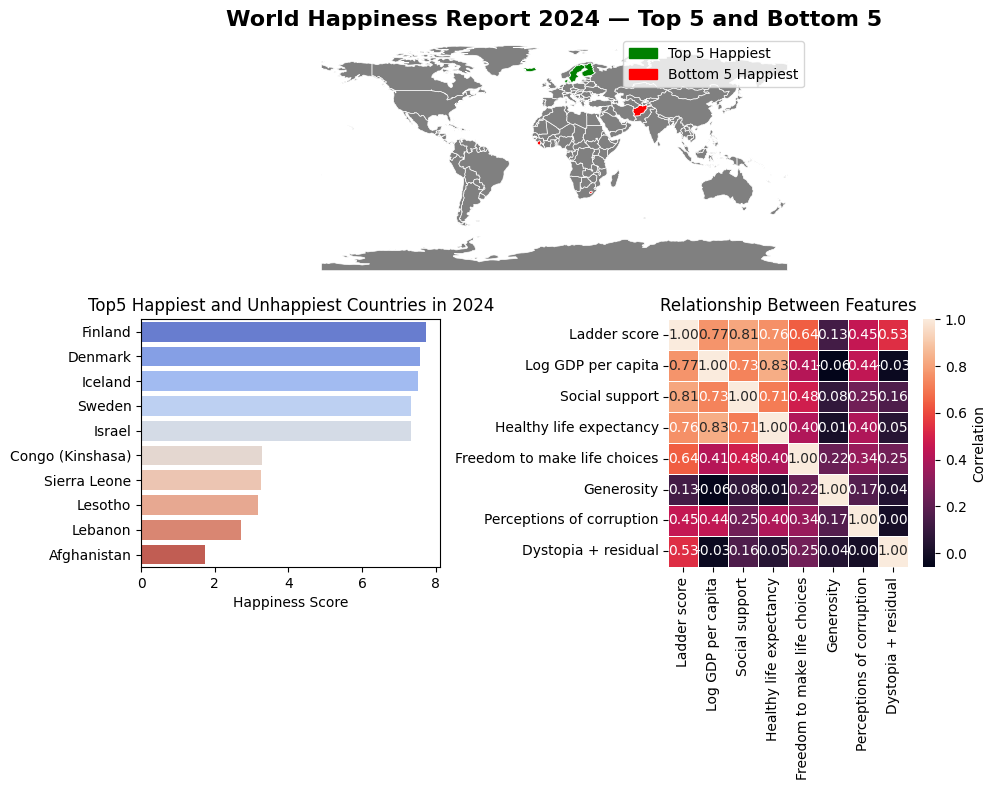

In [37]:


# Load world map from geopandas
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Merge datasets
top5 = df_2024.nlargest(5, 'Ladder score')['Country name'].tolist()
bottom5 = df_2024.nsmallest(5, 'Ladder score')['Country name'].tolist()
# extrem_names = top5_names + bottom5_names

# for index, row in df_2024.iterrows():
#     if row['Country name'] not in extrem_names:
#         df_2024.at[index, 'Ladder score'] = 10

merged = world.merge(df_2024, left_on='ADMIN', right_on='Country name', how='left')
def assign_color(country):
    if country in top5:
        return 'green'
    elif country in bottom5:
        return 'red'
    else:
        return 'grey'

merged['color'] = merged['ADMIN'].apply(assign_color)

# Plot world map
# plt.figure(figsize=(15,15))
# merged.plot(column='Ladder score', cmap='viridis', legend=True, 
#             legend_kwds={'label': "Happiness Score (2024)"})

plt.figure(figsize=(10, 8))
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(40, 6))
ax1 = plt.subplot(2, 1, 1)
#fig.patch.set_facecolor('black')
ax1.set_facecolor('black')
merged.plot(color=merged['color'], edgecolor='white', linewidth=0.5, ax=ax1)
# Add title and legend handles
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color='green', label='Top 5 Happiest'),
    mpatches.Patch(color='red', label='Bottom 5 Happiest')
    # mpatches.Patch(color='white', edgecolor='black', label='Other Countries')
]

ax1.legend(handles=legend_patches, loc='upper right', frameon=True)
ax1.set_title("World Happiness Report 2024 — Top 5 and Bottom 5", fontsize=16, fontweight='bold', color='black')
ax1.axis('off')
# plt.axis('off')

# === 2. Identify top and bottom 5 countries ===
ax2 = plt.subplot(2, 2, 3)
top5 = df_2024.nlargest(5, 'Ladder score')
bottom5 = df_2024.nsmallest(5, 'Ladder score')
combined = pd.concat([top5, bottom5]).sort_values('Ladder score', ascending=False)

colors = ["#008000", "#FFFFFF", "#FF0000"] # Or use (0,1,0), (1,1,1), (1,0,0) in RGB
cmap_name = 'green_red_custom'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

sns.barplot(x = 'Ladder score', y= 'Country name', data = combined, palette = 'coolwarm', ax=ax2)
ax2.set_xlabel('Happiness Score')
ax2.set(ylabel=None) 
ax2.set_title('Top5 Happiest and Unhappiest Countries in 2024')

ax3 = plt.subplot(2, 2, 4)
non_relevant_columns = ['Country name','Regional indicator','upperwhisker','lowerwhisker']
df_2024_numeric = df_2024.drop(columns=non_relevant_columns)
correlation_matrix = df_2024_numeric.corr()
ax3 = sns.heatmap(correlation_matrix, annot = True, fmt ='.2f', linewidth = .7, cbar_kws={'label': 'Correlation'})
ax3.set_title('Relationship Between Features')

plt.tight_layout()
plt.savefig('./World_selected.png', bbox_inches='tight')
plt.show()

In [40]:
df_2024.columns.tolist()

['Country name',
 'Regional indicator',
 'Ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Dystopia + residual']

In [97]:
bottom5

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
142,Afghanistan,South Asia,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102


In [98]:
top5

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


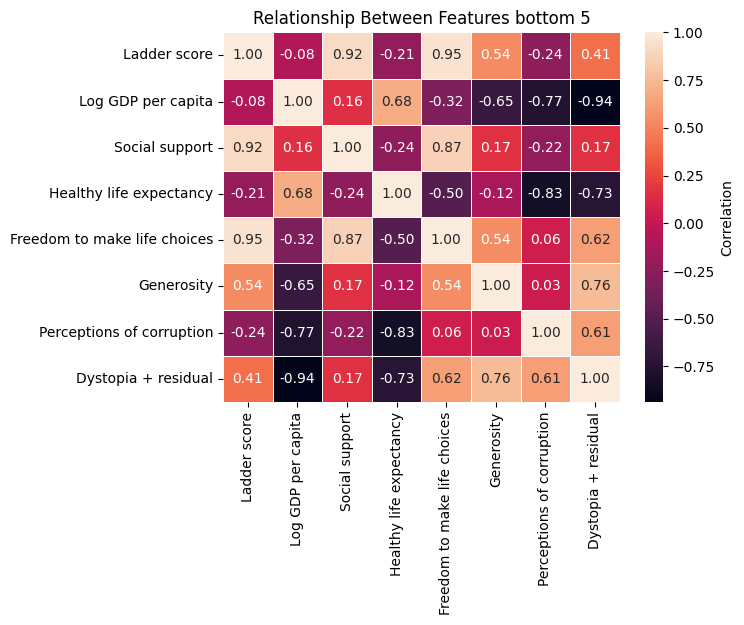

In [20]:
# Drop non-relevant columns

non_relevant_columns = ['Country name','Regional indicator','upperwhisker','lowerwhisker']
df_2024_numeric = bottom5.drop(columns=non_relevant_columns)
correlation_matrix = df_2024_numeric.corr()
sns.heatmap(correlation_matrix, annot = True, fmt ='.2f', linewidth = .7, cbar_kws={'label': 'Correlation'})
plt.title('Relationship Between Features bottom 5')
plt.show()

In [22]:
def circle_countries(country_names):
    # Init the edge color parameter with its default value: same as font color
    df_2024["EdgeColor"] = df_2024["Color"]

    # Change the edge color of the countries in the list
    df_2024.loc[df_2024["Country name"].isin(country_names), "EdgeColor"] = "black"

    return df_2024["EdgeColor"]

In [23]:
def add_country_name(country_names, axis, x_name, y_name):
    # Iterate over each country name
    for country_name in country_names:
        # Find position of the country on the axes
        x_axis = df_2024.loc[df_2024["Country name"] == country_name, x_name]
        y_axis = df_2024.loc[df_2024["Country name"] == country_name, y_name]

        # Add the text at the right position, slighly shift to the top for lisibility
        axis.text(
            x_axis,
            y_axis + 0.025,  # position
            country_name,  # label
            size=6,  # size of the text
            ha="center",  # align the text
        )

C:\Users\ljw44\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
C:\Users\ljw44\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\Users\ljw44\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\ljw44\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is

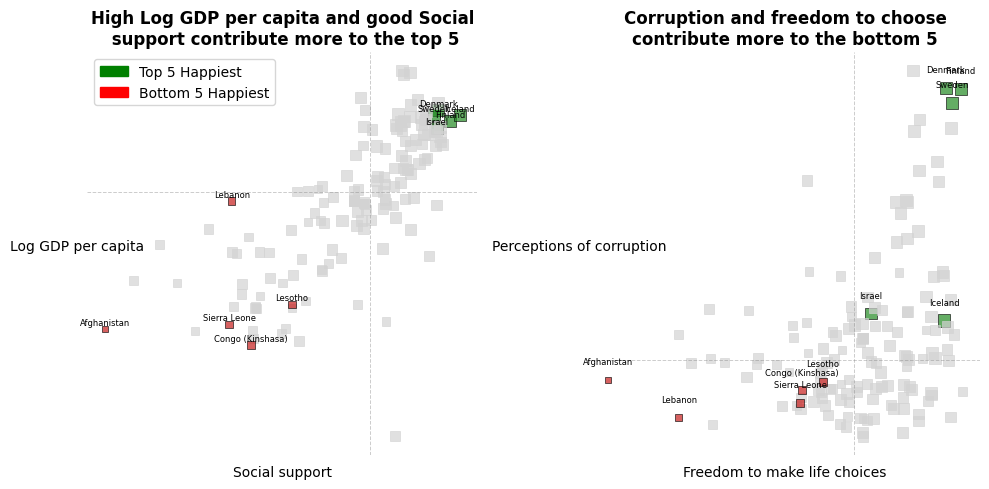

In [39]:
# setup colors
colors = []
for name in df_2024['Country name']:
    if name in bottom5_names:
        colors.append('#c71e1d')
    elif name in top5_names:
        colors.append('#228B22')
    else:
        colors.append('#D3D3D3')

df_2024['Color'] = colors


# Define country to circle
country_to_circle = extrem_names

# Define the edgecolors according to the list
edgecolors = circle_countries(country_to_circle)

# Init the figure and axe
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(10, 5))

# Create the plot1
ax1.scatter(
    df_2024["Social support"],  # x-axis
    df_2024["Log GDP per capita"],  # y-axis
    s=df_2024["Ladder score"] * 10,  # size of the bubble (put on a higher scale with *10)
    c=df_2024["Color"],
    alpha=0.7,
    edgecolor=edgecolors,
    linewidths=0.6,
    marker="s",
    zorder=2,
)

# Add country names on top on each marker
add_country_name(country_to_circle, ax1, "Social support", "Log GDP per capita")

# legend
legend_patches = [
    mpatches.Patch(color='green', label='Top 5 Happiest'),
    mpatches.Patch(color='red', label='Bottom 5 Happiest')
    # mpatches.Patch(color='white', edgecolor='black', label='Other Countries')
]

ax1.legend(handles=legend_patches, loc='upper left', frameon=True)

# Add title
ax1.set_title(
    "High Log GDP per capita and good Social\n support contribute more to the top 5",
    weight="bold",
)
ax1.set_xlabel("Social support")
ax1.set_ylabel("Log GDP per capita", 
              rotation=0,  # shift it horizontally
             )

# Remove the spines (border lines) and scale from the chart
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(axis="both", which="both", length=0)

# Create the plot2
ax2.scatter(
    df_2024["Freedom to make life choices"],  # x-axis
    df_2024["Perceptions of corruption"],  # y-axis
    s=df_2024["Ladder score"] * 10,  # size of the bubble (put on a higher scale with *10)
    c=df_2024["Color"],
    alpha=0.7,
    edgecolor=edgecolors,
    linewidths=0.6,
    marker="s",
    zorder=2,
)

# Add country names on top on each marker
add_country_name(country_to_circle, ax2, "Freedom to make life choices", "Perceptions of corruption")

# Add title
ax2.set_title(
    "Corruption and freedom to choose\ncontribute more to the bottom 5",
    weight="bold",
)
ax2.set_xlabel("Freedom to make life choices")
ax2.set_ylabel("Perceptions of corruption", 
              rotation=0,  # shift it horizontally
             )

# Remove the spines (border lines) and scale from the chart
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(axis="both", which="both", length=0)

# Add reference lines
ax1.axvline(1.21, color="gray", linestyle="--", linewidth=0.7, alpha=0.4)
ax1.axhline(1.43, color="gray", linestyle="--", linewidth=0.7, alpha=0.4)
ax2.axvline(0.6, color="gray", linestyle="--", linewidth=0.7, alpha=0.4)
ax2.axhline(0.12, color="gray", linestyle="--", linewidth=0.7, alpha=0.4)

# Show the plot
plt.tight_layout()
plt.savefig('./bubble.png', bbox_inches='tight')
plt.show()